## **AIM**

**Apply Decision Trees – ID3 and C4.5 classification on the dataset using sklearn and evaluate the results using different parameters.**  

**Dataset:**  
https://www.kaggle.com/code/shikhnu/decision-tree-iris-dataset


**ID3 Algorithm**

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


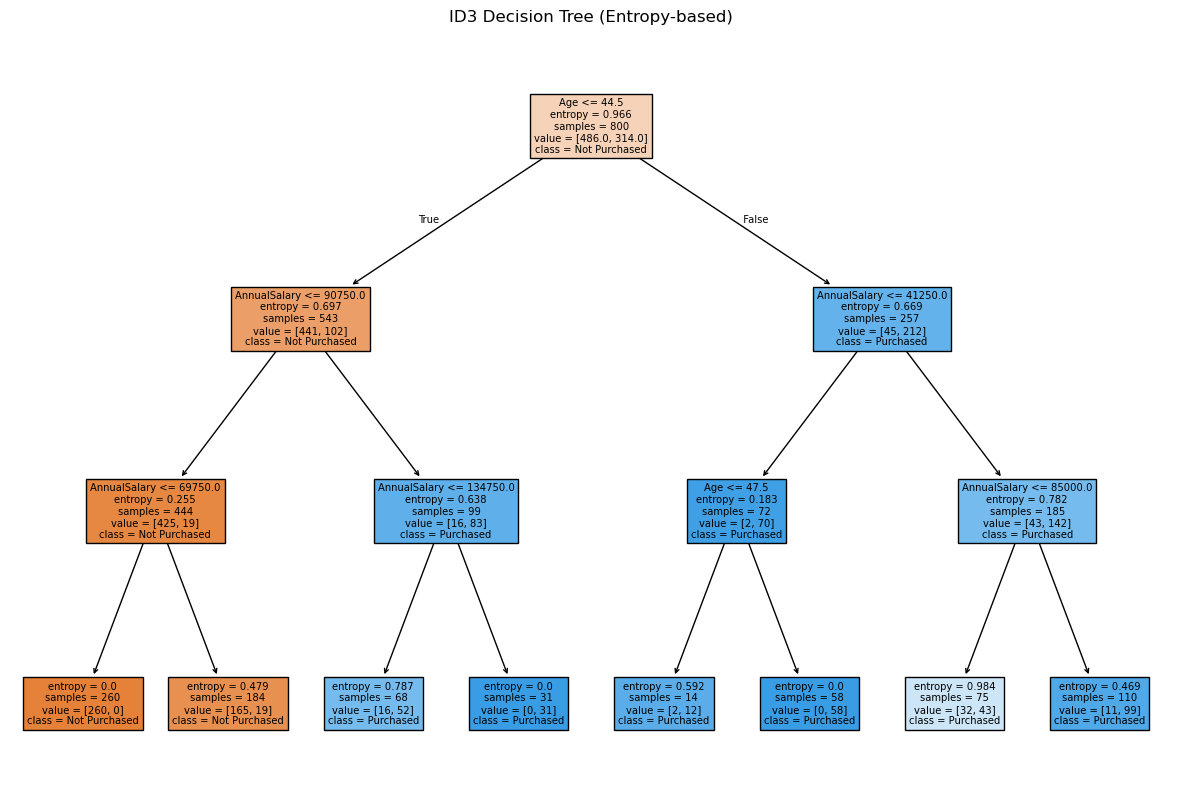

Accuracy : 0.9050
Precision: 0.8485
Recall   : 0.9545

Confusion Matrix:
[[97 15]
 [ 4 84]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv("car_data.csv")
print(data.head())

# Split features and target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Encode categorical column
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- ID3 Decision Tree ---
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot Decision Tree
fig = plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=["User ID", "Gender", "Age", "AnnualSalary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True
)
plt.title("ID3 Decision Tree (Entropy-based)")
plt.show()


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nConfusion Matrix:")
print(cm)


The ID3 Decision Tree model effectively classifies customers’ purchase decisions based on their age and annual salary. The high accuracy, precision, and recall values indicate that the model performs reliably and correctly identifies most buyers and non-buyers. However, a few misclassifications still occur, as seen from the confusion matrix, likely due to overlapping customer characteristics or missing behavioral factors. Overall, the model provides strong and interpretable results, making it a suitable choice for understanding purchasing patterns.

**CART Algorithm**

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


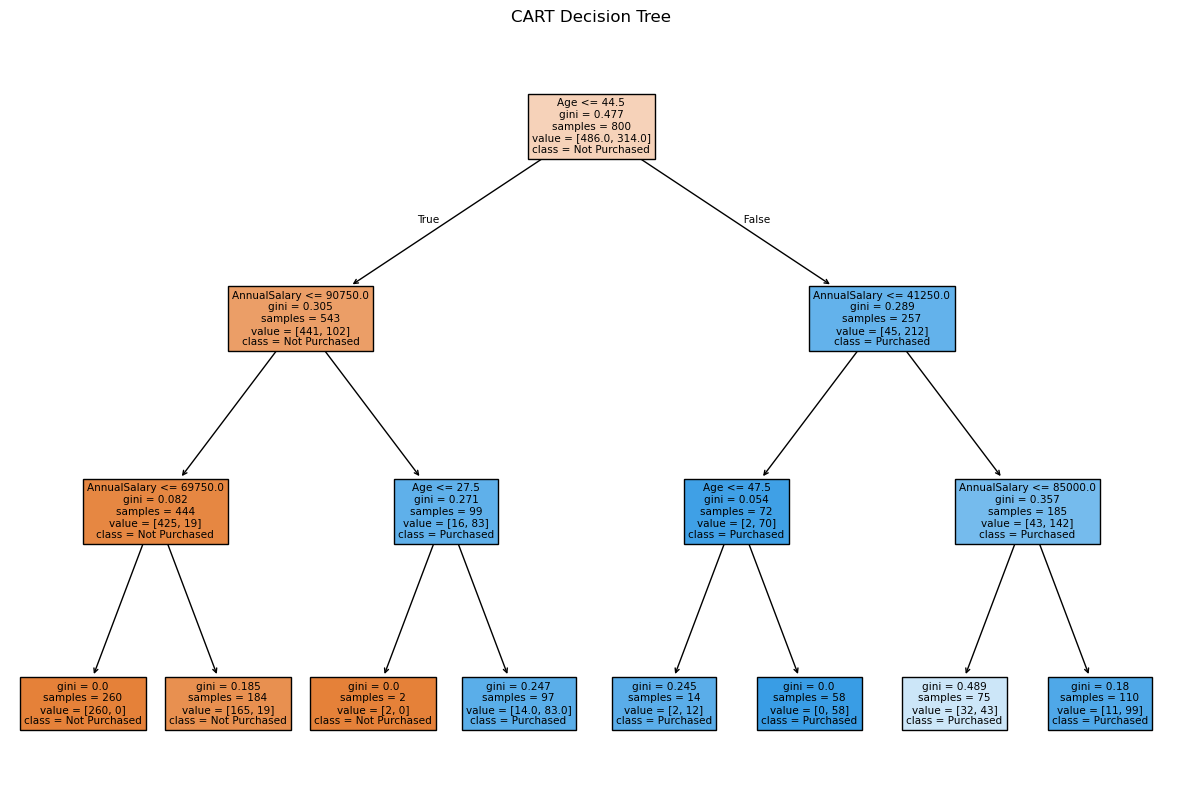

CART Accuracy:  0.9000
CART Precision: 0.8542
CART Recall:    0.9318

Confusion Matrix:
 [[97 15]
 [ 4 84]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = pd.read_csv("car_data.csv")
print(data.head())

# Split into features (X) and target (y)
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Encode categorical column
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CART Classifier (using Gini Index)
clf_cart = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)
clf_cart.fit(X_train, y_train)

# Plot the decision tree
fig = plt.figure(figsize=(15, 10))
plot_tree(
    clf_cart,
    feature_names=["User ID", "Gender", "Age", "AnnualSalary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True
)
plt.title("CART Decision Tree")
plt.show()

# Predictions
y_pred = clf_cart.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"CART Accuracy:  {accuracy:.4f}")
print(f"CART Precision: {precision:.4f}")
print(f"CART Recall:    {recall:.4f}")
print("\nConfusion Matrix:\n", cm)

The CART Decision Tree model worked well in predicting whether a customer would make a purchase or not. It showed high accuracy, precision, and recall, meaning it correctly identified most buyers and non-buyers. Although there were a few wrong predictions, the model overall gives dependable results for understanding customer buying behavior.

**C 4.5 Algorithm**

First 5 rows:
    User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 



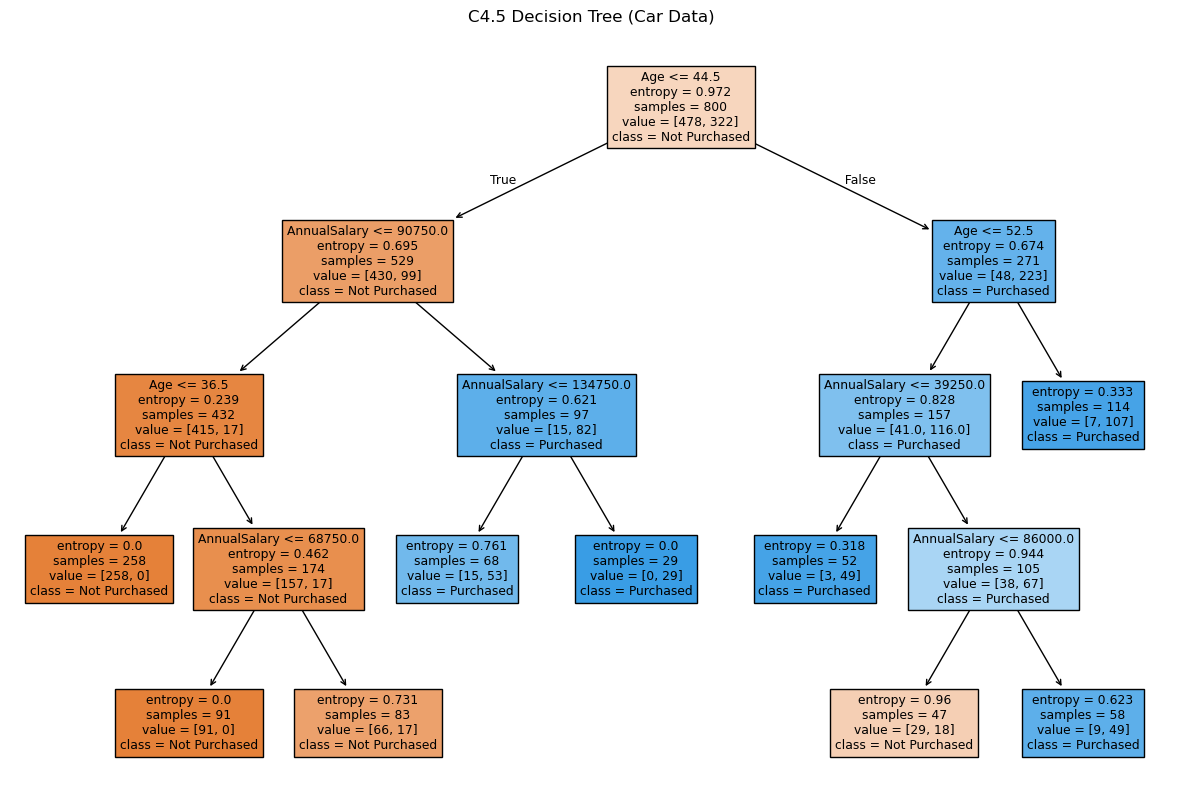

 C4.5 Decision Tree Results (Car Data)

Accuracy:  0.8900
Precision: 0.9028
Recall:    0.8125

Confusion Matrix:
 [[113   7]
 [ 15  65]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("car_data.csv")
print("First 5 rows:\n", data.head(), "\n")

# Separate features and target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Encode categorical feature(s)
encoder = LabelEncoder()
if 'Gender' in X.columns:
    X['Gender'] = encoder.fit_transform(X['Gender'])

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create Decision Tree Classifier (C4.5 style)
clf_c45 = DecisionTreeClassifier(
    criterion='entropy',     # Information Gain (C4.5 base)
    splitter='best',         # Best split selection
    min_samples_split=2,     # Minimum samples to split
    min_samples_leaf=1,      # Minimum samples per leaf
    ccp_alpha=0.01,          # Post-pruning parameter
    random_state=42
)

# Train model
clf_c45.fit(X_train, y_train)

# Predictions
y_pred = clf_c45.predict(X_test)

# Plot tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf_c45,
    feature_names=X.columns,
    class_names=['Not Purchased', 'Purchased'],
    filled=True
)
plt.title("C4.5 Decision Tree (Car Data)")
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f" C4.5 Decision Tree Results (Car Data)\n")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print("\nConfusion Matrix:\n", cm)

The C4.5 Decision Tree model achieved slightly lower accuracy compared to ID3 and CART, but it still performed reasonably well. The precision is high, meaning most of the predicted buyers were actually correct, but the lower recall shows that some real buyers were missed. This happened because the model uses pruning (ccp_alpha) to reduce overfitting, which slightly decreases accuracy but makes the model more general and reliable on unseen data. Overall, the C4.5 model gives a good balance between performance and simplicity, even with a small drop in accuracy.